# Getting Data in Form of List of Dictionary

DONT RERUN THIS UNLESS ABSOLUTELY NESSESARY

In [1]:
!pip3 install torchsummary


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

img_directory = r"/Users/neerajakulkarni/Documents/WADABA"
images = os.listdir(img_directory)
data = []




def parse_name(fn):
    print(fn[0:4])
    ptype = int(fn[fn.find('a')+1 : fn.find('a') + 3]) 
    ptype = ptype - 3 if ptype == 5 or ptype == 6 or ptype == 7 else ptype -1
    color = fn[fn.find('b')+1 : fn.find('b') + 3]
    light = fn[fn.find('c')+1 : fn.find('c') + 2]
    deform = fn[fn.find('d')+1 : fn.find('d') + 2]
    dirt = fn[fn.find('e')+1 : fn.find('e') + 2]
    sl = fn[fn.find('f')+1 : fn.find('f') + 2]
    ring = fn[fn.find('g')+1 : fn.find('g') + 2]
    rand_pos = fn[fn.find('h')+1 : fn.find('h') + 2]
    return ptype, color, light, deform, dirt, sl, ring, rand_pos



for img in images:
    if img[0].isnumeric():
        current_img = Image.open((os.path.join(img_directory, img)))
        ptype, color, light, deform, dirt, sl, ring, rand_pos = parse_name(img)
        img_arr = np.asarray(current_img.resize((224,224)))
        img_data = {'plastic_type': ptype, 'color': color, 'light': light, 'deformation':deform,
                    'dirtiness':dirt, "screw cap or lid": sl, 'ring':ring, 'random position': rand_pos, 'image': img_arr}
        current_img.close()
        data.append(img_data)
    
       

0029
0001
0094
0067
0064
0065
0083
0070
0087
0018
0004
0069
0011
0077
0038
0051
0071
0016
0035
0062
0033
0080
0054
0025
0034
0015
0005
0002
0051
0016
0033
0062
0031
0080
0088
0025
0015
0094
0012
0079
0085
0067
0064
0049
0093
0018
0084
0017
0004
0087
0019
0089
0069
0010
0050
0048
0076
0014
0075
0046
0044
0052
0098
0041
0036
0022
0030
0066
0058
0039
0073
0056
0045
0081
0097
0042
0057
0037
0095
0027
0090
0091
0008
0092
0082
0003
0061
0053
0007
0013
0074
0097
0081
0009
0068
0099
0086
0027
0100
0055
0021
0008
0090
0092
0053
0078
0061
0013
0060
0072
0074
0059
0028
0047
0044
0046
0006
0096
0026
0036
0052
0043
0098
0063
0066
0024
0040
0032
0020
0030
0045
0023
0056
0023
0063
0020
0032
0040
0024
0026
0098
0043
0052
0047
0044
0028
0096
0006
0013
0059
0072
0060
0078
0053
0021
0055
0100
0027
0090
0009
0086
0095
0057
0099
0068
0007
0074
0092
0003
0061
0082
0100
0008
0091
0042
0097
0081
0009
0095
0099
0057
0037
0073
0039
0058
0045
0056
0022
0040
0066
0020
0030
0032
0036
0041
0075
0046
0048
0050
0010


# Converting Data to DataFrame

In [3]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
df = pd.DataFrame(data)

Image.fromarray(df['image'][0])

df['plastic_type'].value_counts()



plastic_type
0    2200
2     640
1     600
3     520
4      40
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = df[df['plastic_type'] != 6]

PET = df[df['plastic_type'] == 0]
PE_HD = df[df['plastic_type'] == 1]
PP = df[df['plastic_type'] == 2]
PS = df[df['plastic_type'] == 3]

In [6]:
def split_all_data(df):
  X = df['image']
  y = df['plastic_type']

  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42) #42

  return X_train, X_test, y_train, y_test

In [7]:
PET_x_train, PET_x_test, PET_y_train, PET_y_test = split_all_data(PET)
PE_HD_x_train, PE_HD_x_test, PE_HD_y_train, PE_HD_y_test = split_all_data(PE_HD)
PP_x_train, PP_x_test, PP_y_train, PP_y_test = split_all_data(PP)
PS_x_train, PS_x_test, PS_y_train, PS_y_test = split_all_data(PS)



In [8]:
X_train = pd.concat([PET_x_train, PE_HD_x_train, PP_x_train, PS_x_train])
X_test = pd.concat([PET_x_test, PE_HD_x_test, PP_x_test, PS_x_test])

y_train = pd.concat([PET_y_train, PE_HD_y_train, PP_y_train, PS_y_train])
y_test = pd.concat([PET_y_test, PE_HD_y_test, PP_y_test, PS_y_test])



In [9]:
X_test = pd.concat([PET_x_test, PE_HD_x_test, PP_x_test, PS_x_test])
y_test = pd.concat([PET_y_test, PE_HD_y_test, PP_y_test, PS_y_test])

X_valid, X_test, y_valid, y_test = train_test_split(
      X_test, y_test, test_size=0.5, random_state=42)

In [10]:
train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_valid, y_valid], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [11]:
from torch.utils.data import DataLoader, Dataset
class CustomImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_arr = self.df['image'].iloc[idx]
        image = Image.fromarray(image_arr)
        label = self.df['plastic_type'].iloc[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [12]:

train_data = CustomImageDataset(train_df,transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]))
valid_data = CustomImageDataset(valid_df,transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]))

test_data = CustomImageDataset(test_df,transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]))


train_data_loader = DataLoader(train_data, batch_size=16, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=16, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=16, shuffle=True)



# Starting out our Models

Modifying The CNNS


In [13]:
#alexnet
alexnet = models.alexnet(pretrained=True)

for param in alexnet.parameters():
    param.requires_grad = False

alexnet.classifier[6] = nn.Linear(4096, 4)#Changing final layer
alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1)) #adding a layer to classify


#resnet50 takes pretty long
resnet50 = models.resnet50(pretrained=True)

for param in resnet50.parameters():
    param.requires_grad = False

resnet50.fc = nn.Linear(2048, 4)
resnet50.add_module("7", nn.LogSoftmax(dim = 1))


#VGG SUPER SLOW

VGG = models.vgg19()

for param in VGG.parameters():
    param.requires_grad = False


VGG.classifier[6] = nn.Linear(4096, 4)#Changing final layer
VGG.classifier.add_module("7", nn.LogSoftmax(dim = 1)) #adding a layer to classify

# inception 
inception = models.inception_v3()

for param in inception.parameters():
    param.requires_grad = False

inception.AuxLogits.fc = nn.Linear(768, 4) 
inception.fc = nn.Linear(2048, 4)  
inception.add_module("7", nn.LogSoftmax(dim=1))  


/Users/neerajakulkarni/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/neerajakulkarni/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/neerajakulkarni/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You 

In [14]:
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [15]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):
           

            inputs = inputs.to(device)
            labels = labels.to(device)

        
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/len(train_data) 
        avg_train_acc = train_acc/len(train_data) 

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/len(test_data)  
        avg_valid_acc = valid_acc/len(test_data) 

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        #torch.save(model, dataset+'_model_'+str(epoch)+'.pt')
            
    return model, history

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 3
#trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)

torch.save(history, 'model' +'_history.pt')
torch.save(trained_model.state_dict(), 'model.pt')


Epoch: 1/3
Batch number: 000, Training: Loss: 1.2730, Accuracy: 0.5625
Batch number: 001, Training: Loss: 1.4009, Accuracy: 0.5625
Batch number: 002, Training: Loss: 0.3681, Accuracy: 0.9375
Batch number: 003, Training: Loss: 0.8995, Accuracy: 0.6875
Batch number: 004, Training: Loss: 1.5531, Accuracy: 0.4375
Batch number: 005, Training: Loss: 0.9849, Accuracy: 0.5625
Batch number: 006, Training: Loss: 1.0236, Accuracy: 0.7500
Batch number: 007, Training: Loss: 1.4070, Accuracy: 0.4375
Batch number: 008, Training: Loss: 0.6594, Accuracy: 0.7500
Batch number: 009, Training: Loss: 0.8966, Accuracy: 0.6875
Batch number: 010, Training: Loss: 1.1217, Accuracy: 0.3750
Batch number: 011, Training: Loss: 0.5240, Accuracy: 0.8125
Batch number: 012, Training: Loss: 0.8468, Accuracy: 0.5625
Batch number: 013, Training: Loss: 0.7453, Accuracy: 0.7500
Batch number: 014, Training: Loss: 0.6817, Accuracy: 0.7500
Batch number: 015, Training: Loss: 0.5375, Accuracy: 0.8125
Batch number: 016, Training: 

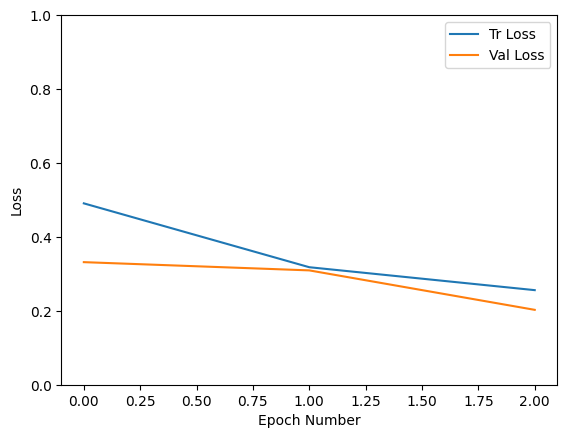

In [17]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
#plt.xlim(-1,num_epochs)
plt.savefig('_loss_curve.png')
plt.show()

In [18]:
history

array([[0.49071163, 0.33163539, 0.80239899, 0.85353535],
       [0.31791917, 0.30935048, 0.87247475, 0.87121212],
       [0.25589338, 0.20259667, 0.89962121, 0.93181818]])

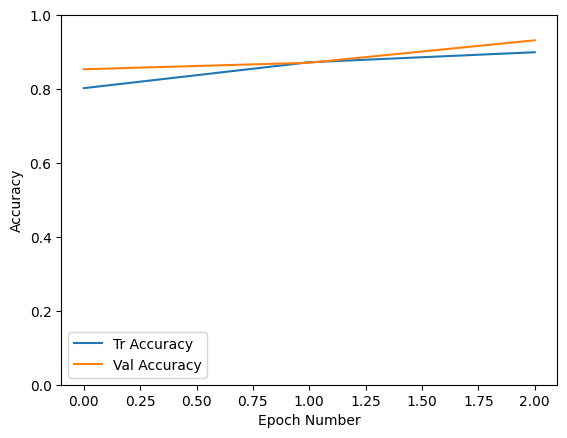

In [19]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('_accuracy_curve.png')
plt.show()

In [20]:
def img_transform(img):
    img_transformations = transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                [0.229, 0.224, 0.225])
        ])
    return img_transformations(img)

In [21]:
def process_image(fn):
    img = Image.open(fn).convert('RGB')
    img = img.resize((224,224))

    test_img_tensor = img_transform(img)

    return test_img_tensor


In [22]:

#def test_model(input):
 #   img = process_image(input)
  #  return alexnet(img)

In [23]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

model = alexnet

model.load_state_dict(torch.load('model.pt', weights_only=True))
model.eval()



#def test_model(input):
#    img = process_image(input)
 #   return model(img)

#test_model('img.png')

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [24]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    transform = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
    ])

    test_image = Image.open(test_image_name).convert('RGB')
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        print(torch.argmax(out).item())

        ps = torch.exp(out)
        topk = ps.topk(4, dim=1)

        #scores = topk.values.numpy()
        #predictions = topk.indices.numpy()

        #max_score_index = np.argmax(scores)
        #max_pred = predictions[max_score_index]

    # print(max_pred)

        results = topk.values.cpu().numpy()[0]
        #print(results)
        #print(np.where( results == max(results))[0][0])


In [25]:
def run_test(model, loss_criterion):
     
   
    model.eval()
    valid_loss = 0.0
    valid_acc = 0.0
    with torch.no_grad():

            # Set to evaluation mode
            

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            

    avg_valid_loss = valid_loss/len(test_data)  
    avg_valid_acc = valid_acc/len(test_data) 

    return avg_valid_loss, avg_valid_acc

In [26]:
run_test(alexnet, loss_func)

(0.2025966839958923, 0.9318181824202489)

TESTING


In [27]:
#WRONG

predict(model, 't2.png')
predict(model, 't1.png')
predict(model, 't5.png') #
predict(model, 't55.png') 
predict(model, 't555.png') #
predict(model, 't22.png') 
predict(model, 't111.png') #

FileNotFoundError: [Errno 2] No such file or directory: '/Users/neerajakulkarni/PlasticID/t2.png'

1
0
2
1


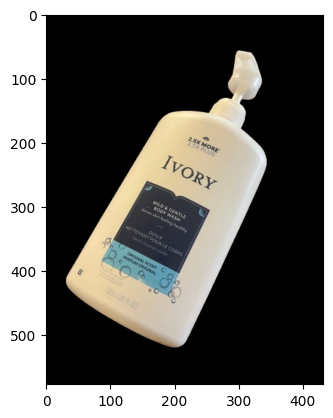

In [247]:
#RIGHT
predict(model, 't2.png')
predict(model, 't1.png')
predict(model, 't55.png') 
predict(model, 't22.png') 

3
2
1


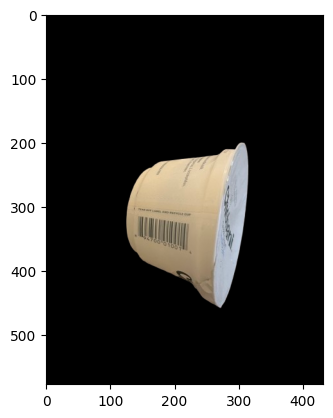

In [250]:


#predict(model, 't2.png')
#predict(model, 't1.png')
predict(model, 't5.png') #
predict(model, 't55.png')



predict(model, 't555.png') #